<a href="https://colab.research.google.com/github/gamana29/MODIS-Satellite-data-AICTE-Internship/blob/main/Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [23]:
df1 = pd.read_csv('modis_2021_India.csv')
df2 = pd.read_csv('modis_2022_India.csv')
df3 = pd.read_csv('modis_2023_India.csv')

In [24]:
df1.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0.0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0.0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0.0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0.0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0.0


In [25]:
df2.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,30.1138,80.0756,300.0,1.2,1.1,2022-01-01,511,Terra,MODIS,7,6.03,288.4,7.1,D,0
1,23.7726,86.2078,306.1,1.6,1.2,2022-01-01,512,Terra,MODIS,62,6.03,293.5,10.4,D,2
2,22.2080,84.8627,304.8,1.4,1.2,2022-01-01,512,Terra,MODIS,42,6.03,293.3,5.8,D,2
3,23.7621,86.3946,306.9,1.6,1.2,2022-01-01,512,Terra,MODIS,38,6.03,295.2,9.3,D,2
4,23.6787,86.0891,303.6,1.5,1.2,2022-01-01,512,Terra,MODIS,52,6.03,293.1,7.2,D,2


In [26]:
df3.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0


In [27]:
df = pd.concat([df1, df2, df3], ignore_index=True)
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0.0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0.0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0.0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0.0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0.0


In [28]:
df.shape

(240772, 15)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240772 entries, 0 to 240771
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    240772 non-null  float64
 1   longitude   240772 non-null  float64
 2   brightness  240772 non-null  float64
 3   scan        240772 non-null  float64
 4   track       240772 non-null  float64
 5   acq_date    240772 non-null  object 
 6   acq_time    240772 non-null  int64  
 7   satellite   240772 non-null  object 
 8   instrument  240772 non-null  object 
 9   confidence  240772 non-null  int64  
 10  version     240772 non-null  float64
 11  bright_t31  240772 non-null  float64
 12  frp         240772 non-null  float64
 13  daynight    240771 non-null  object 
 14  type        240771 non-null  float64
dtypes: float64(9), int64(2), object(4)
memory usage: 27.6+ MB


In [30]:
df.isnull().sum()

,0
latitude,0
longitude,0
brightness,0
scan,0
track,0
acq_date,0
acq_time,0
satellite,0
instrument,0
confidence,0


In [31]:
df.duplicated().sum()

np.int64(0)

In [32]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,240772.0,23.441802,4.741857,8.1592,20.744075,23.54530,26.2607,34.9734
longitude,240772.0,81.809087,6.627135,68.4526,76.415425,79.93805,85.2592,97.1044
brightness,240772.0,324.324206,14.588031,300.0000,314.800000,323.00000,331.5000,505.7000
scan,240772.0,1.425931,0.636604,1.0000,1.000000,1.20000,1.5000,4.8000
track,240772.0,1.153932,0.203429,1.0000,1.000000,1.10000,1.2000,2.0000
acq_time,240772.0,828.276461,366.603149,321.0000,642.000000,752.00000,825.0000,2202.0000
confidence,240772.0,64.463671,18.223680,0.0000,54.000000,66.00000,76.0000,100.0000
version,240772.0,23.944770,25.775495,6.0300,6.030000,6.03000,61.0300,61.0300
bright_t31,240772.0,303.903382,8.594469,267.2000,298.100000,303.10000,310.2000,400.1000
frp,240772.0,29.081742,85.683701,0.0000,8.800000,13.80000,25.2000,6961.8000


In [34]:
df.type.value_counts()

,count
type,
0.0,229337
2.0,11398
3.0,36


In [35]:
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique values: ['2021-01-01' '2021-01-02' '2021-01-03' '2021-01-04' '2021-01-05'
 '2021-01-06' '2021-01-07' '2021-01-08' '2021-01-09' '2021-01-10'
 '2021-01-11' '2021-01-12' '2021-01-13' '2021-01-14' '2021-01-15'
 '2021-01-16' '2021-01-17' '2021-01-18' '2021-01-19' '2021-01-20'
 '2021-01-21' '2021-01-22' '2021-01-23' '2021-01-24' '2021-01-25'
 '2021-01-26' '2021-01-27' '2021-01-28' '2021-01-29' '2021-01-30'
 '2021-01-31' '2021-02-01' '2021-02-02' '2021-02-03' '2021-02-04'
 '2021-02-05' '2021-02-06' '2021-02-07' '2021-02-08' '2021-02-09'
 '2021-02-10' '2021-02-11' '2021-02-12' '2021-02-13' '2021-02-14'
 '2021-02-15' '2021-02-16' '2021-02-17' '2021-02-18' '2021-02-19'
 '2021-02-20' '2021-02-21' '2021-02-22' '2021-02-23' '2021-02-24'
 '2021-02-25' '2021-02-26' '2021-02-27' '2021-02-28' '2021-03-01'
 '2021-03-02' '2021-03-03' '2021-03-04' '2021-03-05' '2021-03-06'
 '2021-03-07' '2021-03-08' '2021-03-09' '2021-03-10' '2021-03-11'
 '2021-03-12' '2021-03-13' '2021-03-14' '202

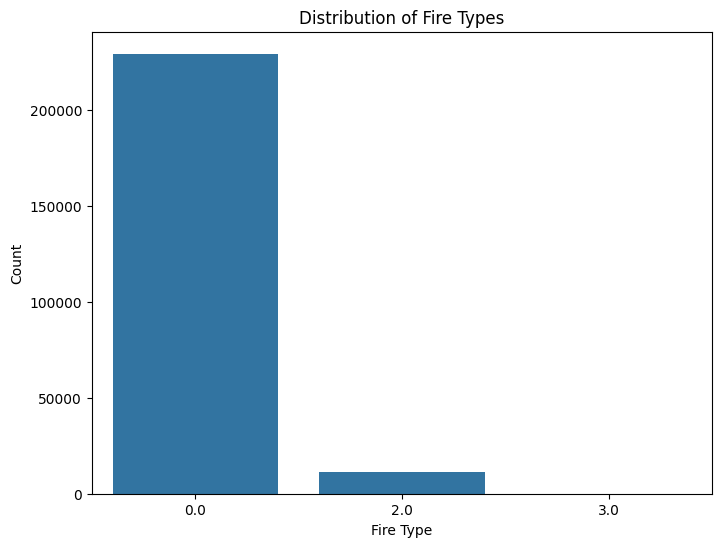

In [36]:
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()

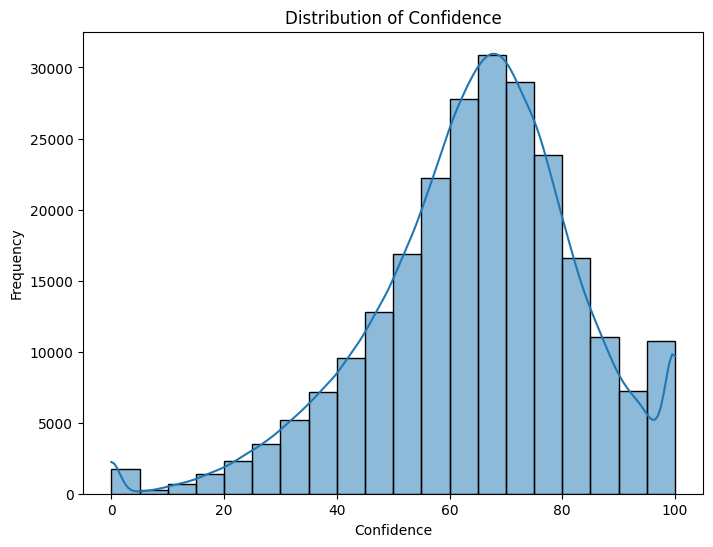

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

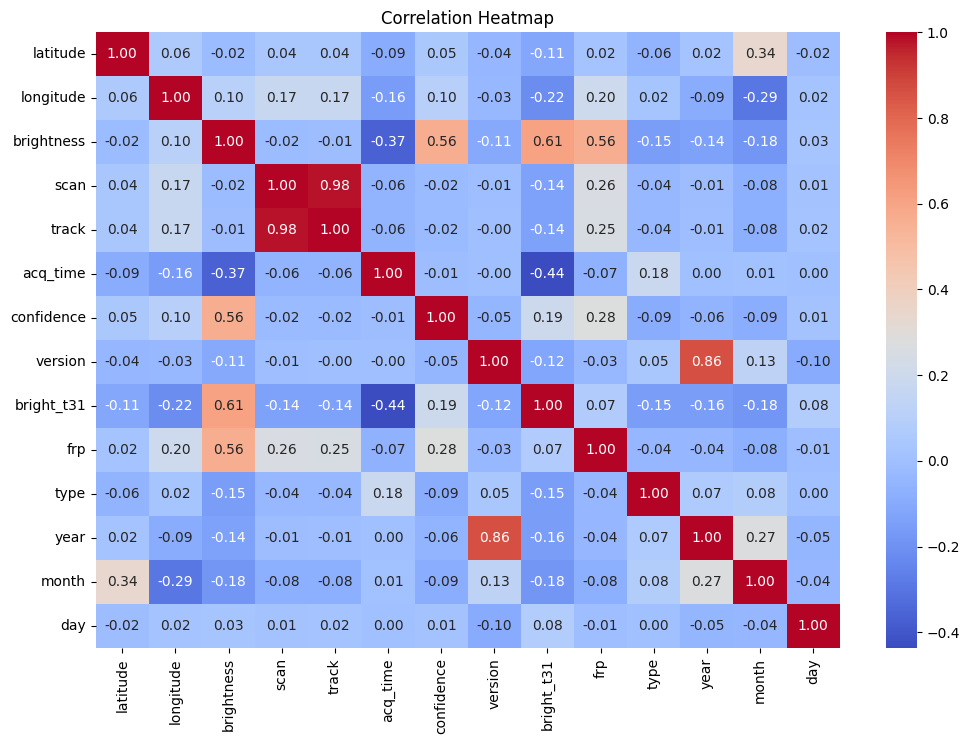

In [42]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


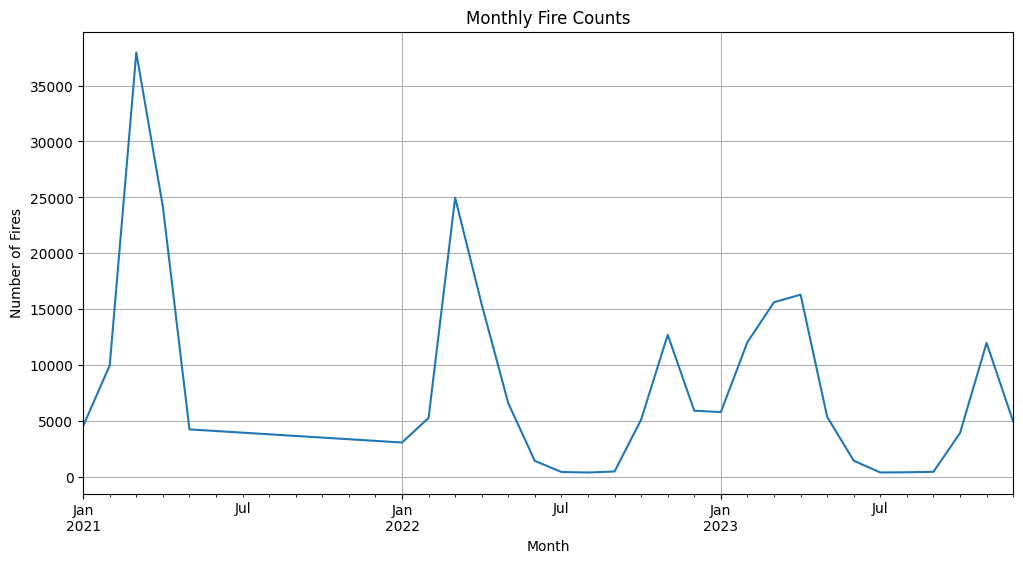

In [43]:
df['acq_date'] = pd.to_datetime(df['acq_date'])
fires_per_month = df.groupby(df['acq_date'].dt.to_period('M')).size()

fires_per_month.plot(kind='line', figsize=(12, 6))
plt.title("Monthly Fire Counts")
plt.xlabel("Month")
plt.ylabel("Number of Fires")
plt.grid()
plt.show()
